In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
from sklearn.datasets import load_iris

In [12]:
iris_data = load_iris()

In [13]:
iris_data

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [14]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [16]:
data = iris_data["data"]
target = iris_data["target"]
target_names = iris_data["target_names"]
feature_names = iris_data["feature_names"]

In [18]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
feature_names_for_col = [item.split("(")[0].replace(" ", "_")[:-1] for item in feature_names]

In [23]:
feature_names_for_col

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [26]:
iris_df = pd.DataFrame(data, columns = feature_names_for_col)

In [27]:
iris_df["target"] = target

In [28]:
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


## 可視化

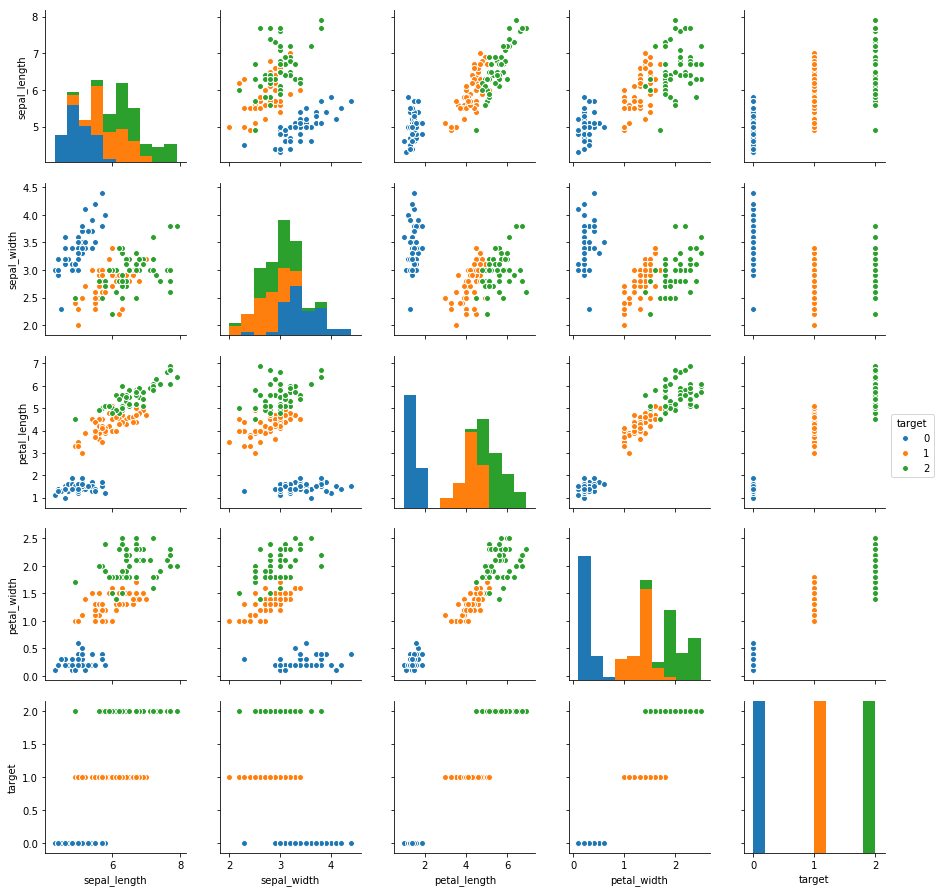

In [31]:
sns.pairplot(iris_df, hue="target")

In [32]:
# 4x4にしたい場合は文字列にしてやればいい。

In [33]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
target_num_list = [0, 1, 2]
target_name_dict = {val: name for (val, name) in zip(target_num_list, target_names)}

In [36]:
species_list = [target_name_dict[item] for item in target]

In [37]:
iris_df["species"] = species_list

In [40]:
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [41]:
use_col = list(iris_df.columns)
use_col.remove('target')

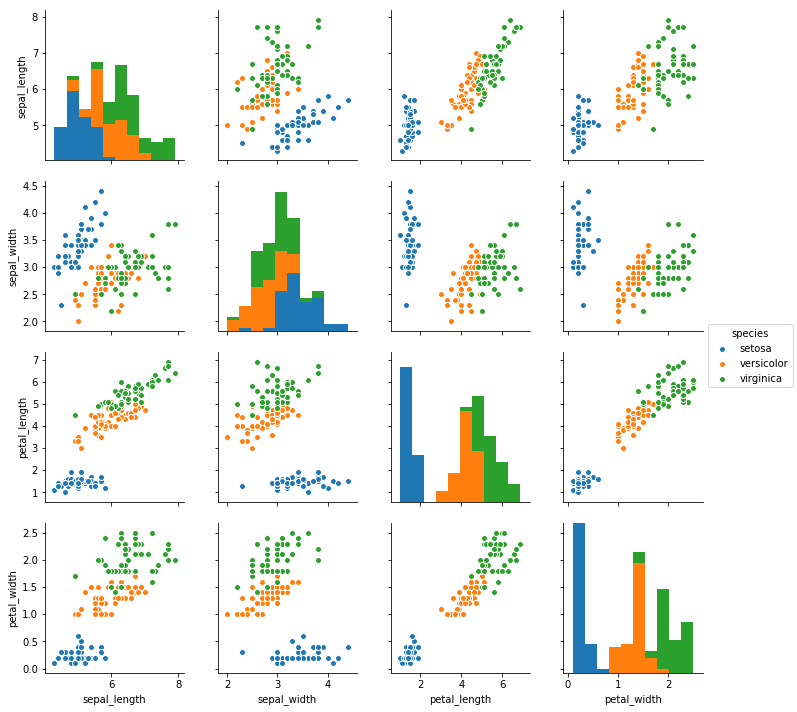

In [42]:
sns.pairplot(iris_df[use_col], hue="species")

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(iris_df[feature_names_for_col], iris_df["target"], test_size=0.33, random_state=42)

In [46]:
list(map(len, [X_train, X_test, y_train, y_test]))

[100, 50, 100, 50]

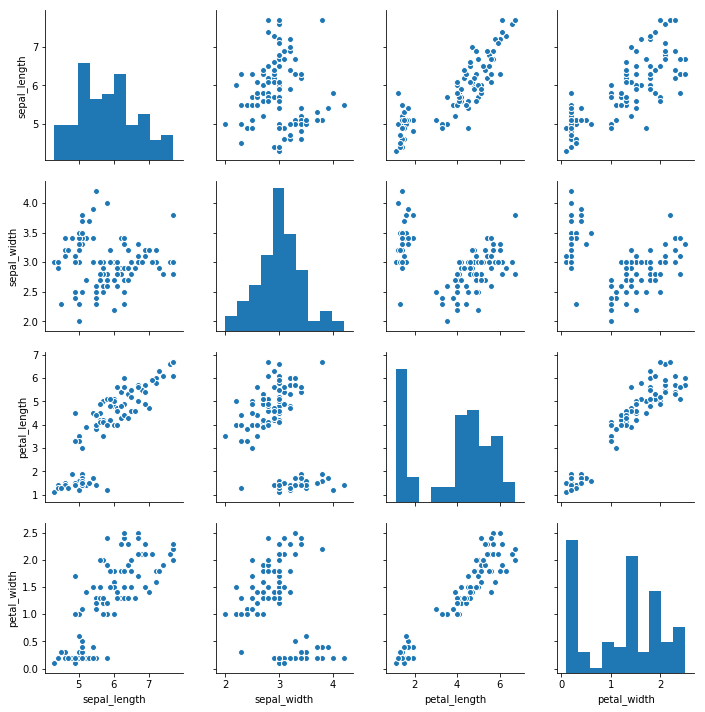

In [47]:
sns.pairplot(X_train)

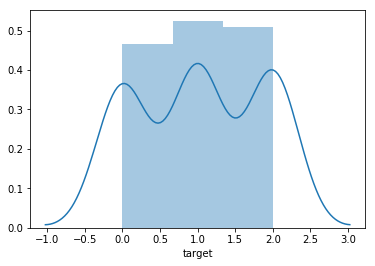

In [48]:
sns.distplot(y_train)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
result = accuracy_score(y_test, pred)

In [52]:
result

1.0

何も言えねー

In [53]:
# boston housing data setに切り替える

In [60]:
boston_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",  header=None, sep='\s+')

In [62]:
boston_header = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
                    "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [63]:
boston_df = boston_data.copy()
boston_df.columns = boston_header

In [64]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [65]:
boston_df.to_csv("../input/housing_dataset.csv", index=False)

回帰じゃん